In [8]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import mode
import scanpy as sc
import sklearn
import warnings
import scgpt as scg

try:
    import faiss
    
    faiss_imported = True
except ImportError:
    faiss_imported = False
    print(
        "faiss not installed! We highly recommend installing it for fast similarity search."
    )
    print("To install it, see https://github.com/facebookresearch/faiss/wiki/Installing-Faiss")

warnings.filterwarnings("ignore", category=ResourceWarning)
    

# Referrence mapping using a customized reference dataset

In [9]:
model_dir = Path("../Models/scGPT_human/")
adata = sc.read_h5ad("../data/annotation_pancreas/demo_train.h5ad")
cell_type_key = "Celltype"
gene_col = "index"

In [10]:
ref_embed_adata = scg.tasks.embed_data(
    adata,
    model_dir,
    gene_col=gene_col,
    obs_to_save=cell_type_key,
    batch_size=64,
    return_new_adata=True,
)

scGPT - INFO - match 2999/3000 genes in vocabulary of size 60697.


/home/jon/anaconda3/envs/scGPT/lib/python3.9/site-packages/scgpt/model/model.py:77: UserWarning: flash-attn is not installed, using pytorch transformer instead. Set use_fast_transformer=False to avoid this warning. Installing flash-attn is highly recommended.
  warnings.warn(
Embedding cells: 100%|██████████████████████████████████████████████| 166/166 [00:16<00:00,  9.99it/s]
/home/jon/anaconda3/envs/scGPT/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


/home/jon/anaconda3/envs/scGPT/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


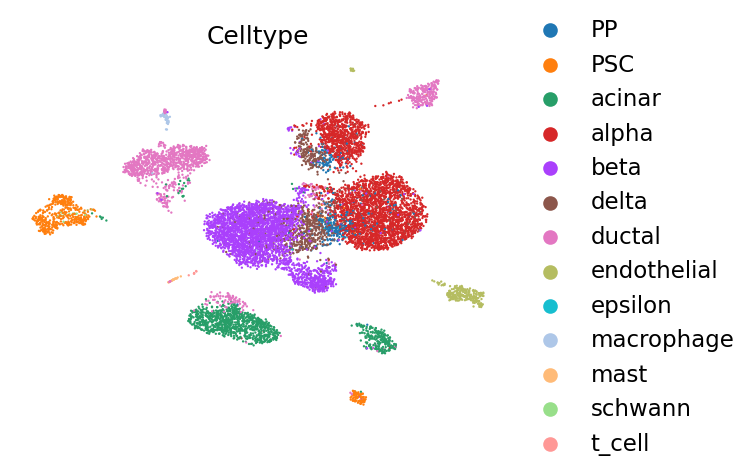

In [11]:
# Optional step to visualize the reference dataset using the embeddings
sc.pp.neighbors(ref_embed_adata, use_rep="X")
sc.tl.umap(ref_embed_adata)
sc.pl.umap(ref_embed_adata, color=cell_type_key, frameon=False, wspace=0.4)

In [13]:
adata.var_names[:20]

Index(['COL1A1', 'COL1A2', 'PPY', 'CTRB1', 'CELA3A', 'CTRB2', 'SPINK1',
       'COL3A1', 'CPB1', 'COL6A3', 'SPARC', 'CPA1', 'SPP1', 'CLPS', 'CELA3B',
       'REG1A', 'PLA2G1B', 'REG1B', 'COL6A1', 'REG3A'],
      dtype='object')